In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.random.set_seed(99)

In [3]:
fas_mnist=tf.keras.datasets.fashion_mnist

In [4]:
(train_images,train_labels),(test_images,test_labels)=fas_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
train_images=train_images.reshape(60000, 28, 28)
train_images=train_images / 255.0 #Standardising
test_images = test_images.reshape(10000, 28, 28)
test_images=test_images/255.0 #Standardising

In [6]:
model = tf.keras.Sequential([
  tf.keras.Input(shape=(28,28)),
  tf.keras.layers.GRU(128),
  tf.keras.layers.Dense(128, activation='relu',input_shape=(28, 28, )),
  tf.keras.layers.Dropout(0.2,input_shape=(128,)),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               60672     
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 78474 (306.54 KB)
Trainable params: 78474 (306.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
def scheduler(epoch, lr):
      if epoch < 8:
        return lr
      else:
        return lr * tf.math.exp(-0.1)

In [10]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=2),
    tf.keras.callbacks.LearningRateScheduler(scheduler)
]

In [11]:
trainer=model.fit(train_images, train_labels,validation_data=(test_images,test_labels), epochs=20,callbacks=my_callbacks)

Epoch 1/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.6250 - accuracy: 0.7658 - val_loss: 0.4451 - val_accuracy: 0.8373 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3967 - accuracy: 0.8564 - val_loss: 0.3822 - val_accuracy: 0.8598 - lr: 0.0010
Epoch 3/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3500 - accuracy: 0.8716 - val_loss: 0.3585 - val_accuracy: 0.8685 - lr: 0.0010
Epoch 4/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3197 - accuracy: 0.8813 - val_loss: 0.3266 - val_accuracy: 0.8801 - lr: 0.0010
Epoch 5/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2976 - accuracy: 0.8892 - val_loss: 0.3186 - val_accuracy: 0.8856 - lr: 0.0010
Epoch 6/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2817 - accuracy: 0.8967 - val_loss: 0.3040 - val_accuracy: 0.8903 - lr: 0.0010
Epoch 7/20
1875/1875 [==========================

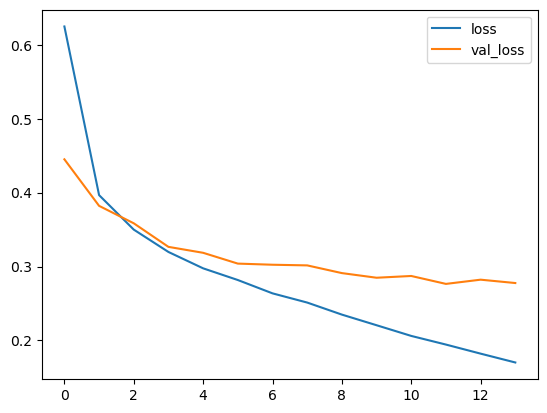

In [12]:
# Plot loss per iteration
plt.plot(trainer.history['loss'], label='loss')
plt.plot(trainer.history['val_loss'], label='val_loss')
plt.legend()